In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./data/revenue_distribution_by_sector.csv')
d1 = df["entity_id"].describe()
d2 = df["nace_level_1_code"].describe()
d3 = df["nace_level_1_name"].describe()
d4 = df["nace_level_2_code"].describe()
d5 = df["nace_level_2_name"].describe()
d6 = df["revenue_pct"].describe()
display(d1)
display(d2)
display(d3)
display(d4)
display(d5)
display(d6)
print(df["entity_id"].nunique())

count      799.000000
mean      3022.657071
std       2451.801339
min         29.000000
25%       1477.000000
50%       2349.000000
75%       3559.500000
max      10801.000000
Name: entity_id, dtype: float64

count     799
unique     20
top         C
freq      303
Name: nace_level_1_code, dtype: object

count               799
unique               20
top       Manufacturing
freq                303
Name: nace_level_1_name, dtype: object

count    799.000000
mean      46.420526
std       23.144493
min        1.000000
25%       26.000000
50%       47.000000
75%       63.000000
max       97.000000
Name: nace_level_2_code, dtype: float64

count                       799
unique                       79
top       Publishing activities
freq                         48
Name: nace_level_2_name, dtype: object

count    799.000000
mean       0.598248
std        0.373331
min        0.000264
25%        0.224817
50%        0.571697
75%        1.000000
max        1.000000
Name: revenue_pct, dtype: float64

478


<Figure size 1800x800 with 0 Axes>

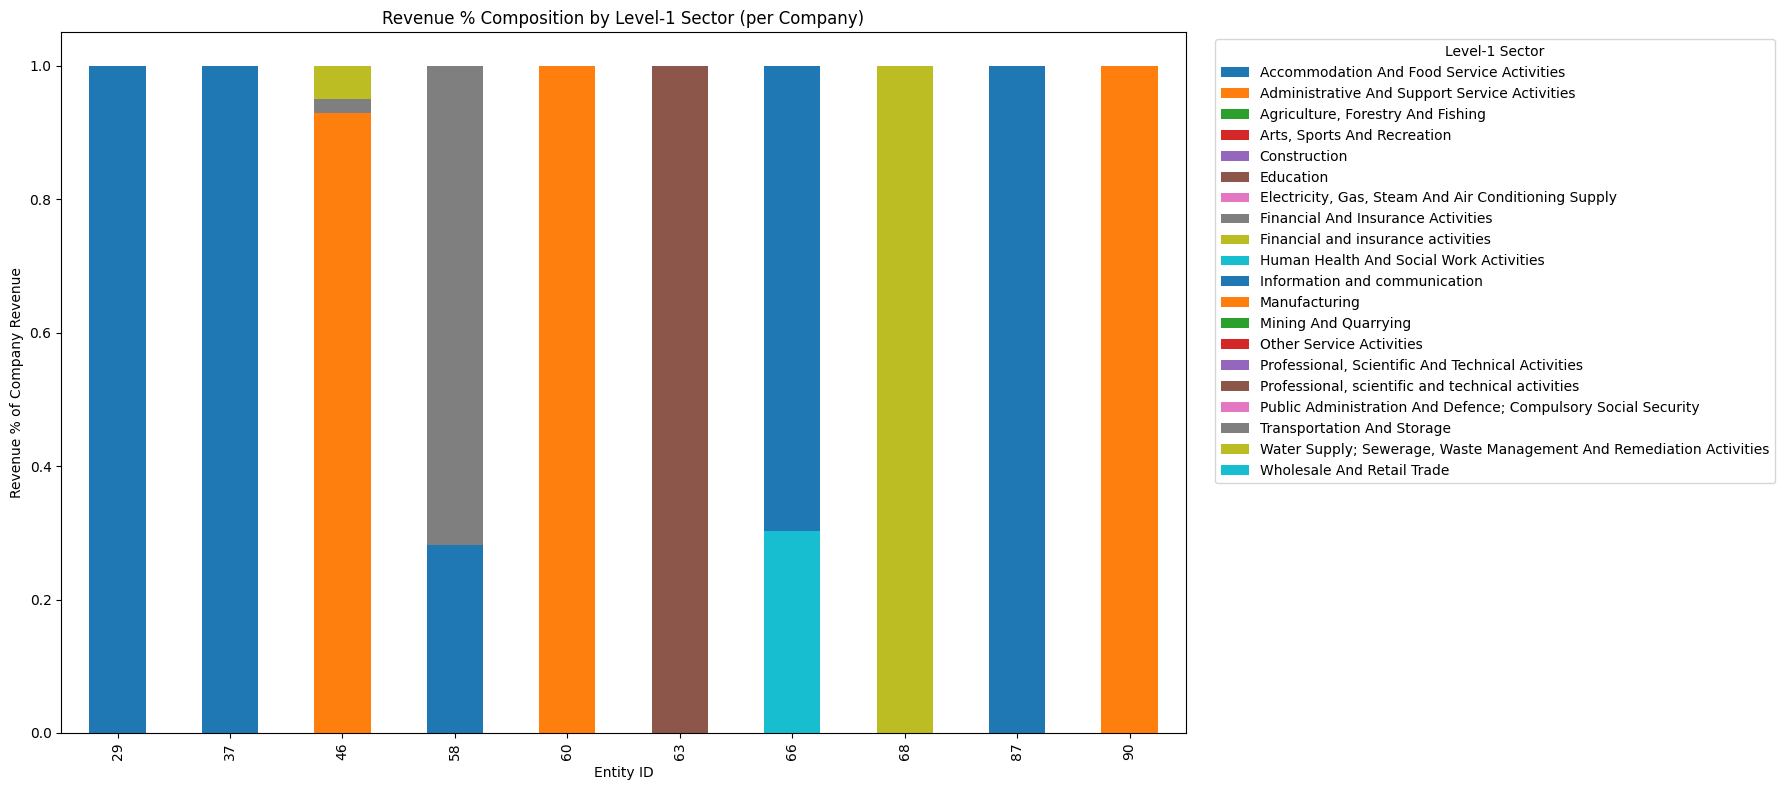

In [10]:
rev_by_entity_lvl1 = (
    df
    .groupby(["entity_id", "nace_level_1_name"])["revenue_pct"]
    .sum()
    .reset_index()
)
entity_lvl1_matrix = rev_by_entity_lvl1.pivot(
    index="entity_id",
    columns="nace_level_1_name",
    values="revenue_pct"
).fillna(0)
row_sums = entity_lvl1_matrix.sum(axis=1)
top_entities = entity_lvl1_matrix.head(10)

plt.figure(figsize=(18, 8))
top_entities.plot(
    kind="bar",
    stacked=True,
    figsize=(18, 8)
)

plt.title("Revenue % Composition by Level-1 Sector (per Company)")
plt.xlabel("Entity ID")
plt.ylabel("Revenue % of Company Revenue")
plt.legend(title="Level-1 Sector", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/tm/nhkjnn497ns96d08fh2zd95w0000gn/T/ipykernel_33396/2351308453.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(6, "revenue_pct"))


<Figure size 1600x1000 with 0 Axes>

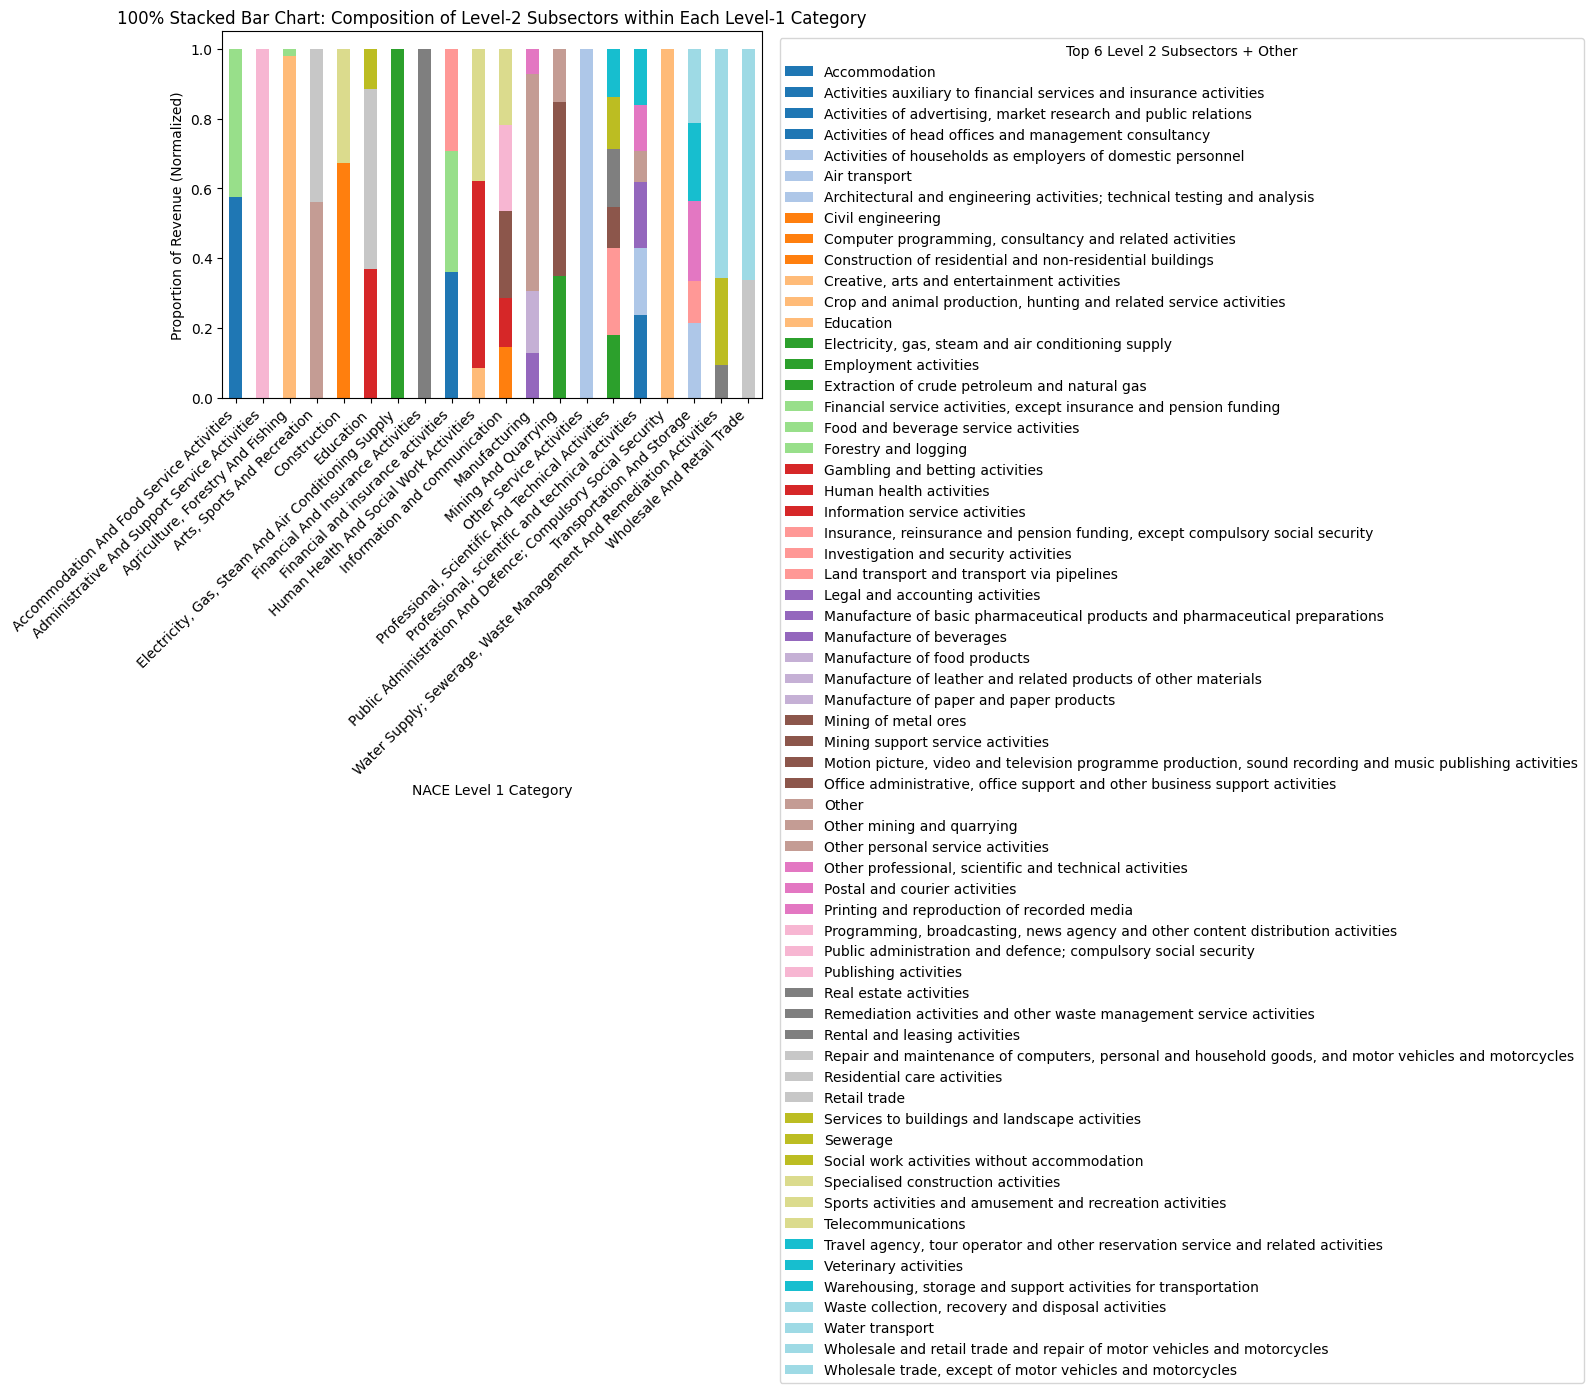

In [12]:
g = (
    df.groupby(["nace_level_1_name", "nace_level_2_name"])["revenue_pct"]
      .mean()
      .reset_index()
)
top5 = (
    g.groupby("nace_level_1_name", group_keys=False)
     .apply(lambda x: x.nlargest(6, "revenue_pct"))
)
other = (
    g.merge(top5, how="outer", indicator=True)
     .query("_merge == 'left_only'")
     .drop(columns=["_merge"])
)

other_grouped = (
    other.groupby("nace_level_1_name")["revenue_pct"]
         .sum()
         .reset_index()
)
other_grouped["nace_level_2_name"] = "Other"
final = pd.concat([top5, other_grouped], ignore_index=True)

pivot = final.pivot(
    index="nace_level_1_name",
    columns="nace_level_2_name",
    values="revenue_pct"
).fillna(0)

pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)
plt.figure(figsize=(16, 10))
pivot_norm.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 10),
    colormap="tab20"
)

plt.title("100% Stacked Bar Chart: Composition of Level-2 Subsectors within Each Level-1 Category")
plt.ylabel("Proportion of Revenue (Normalized)")
plt.xlabel("NACE Level 1 Category")
plt.legend(title="Top 6 Level 2 Subsectors + Other", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Printing and reproduction of recorded media'),
  Text(1, 0, 'Manufacture of beverages'),
  Text(2, 0, 'Gambling and betting activities'),
  Text(3, 0, 'Motion picture, video and television programme production, sound recording and music publishing activities'),
  Text(4, 0, 'Residential care activities'),
  Text(5, 0, 'Manufacture of leather and related products of other materials'),
  Text(6, 0, 'Investigation and security activities'),
  Text(7, 0, 'Education'),
  Text(8, 0, 'Manufacture of food products'),
  Text(9, 0, 'Telecommunications'),
  Text(10, 0, 'Manufacture of basic pharmaceutical products and pharmaceutical preparations'),
  Text(11, 0, 'Manufacture of paper and paper products'),
  Text(12, 0, 'Manufacture of motor vehicles, trailers and semi-trailers'),
  Text(13, 0, 'Activities auxiliary to financial services and insurance activities'),
  Text(14, 0, 'Manufacture of chemicals and chemical products')])

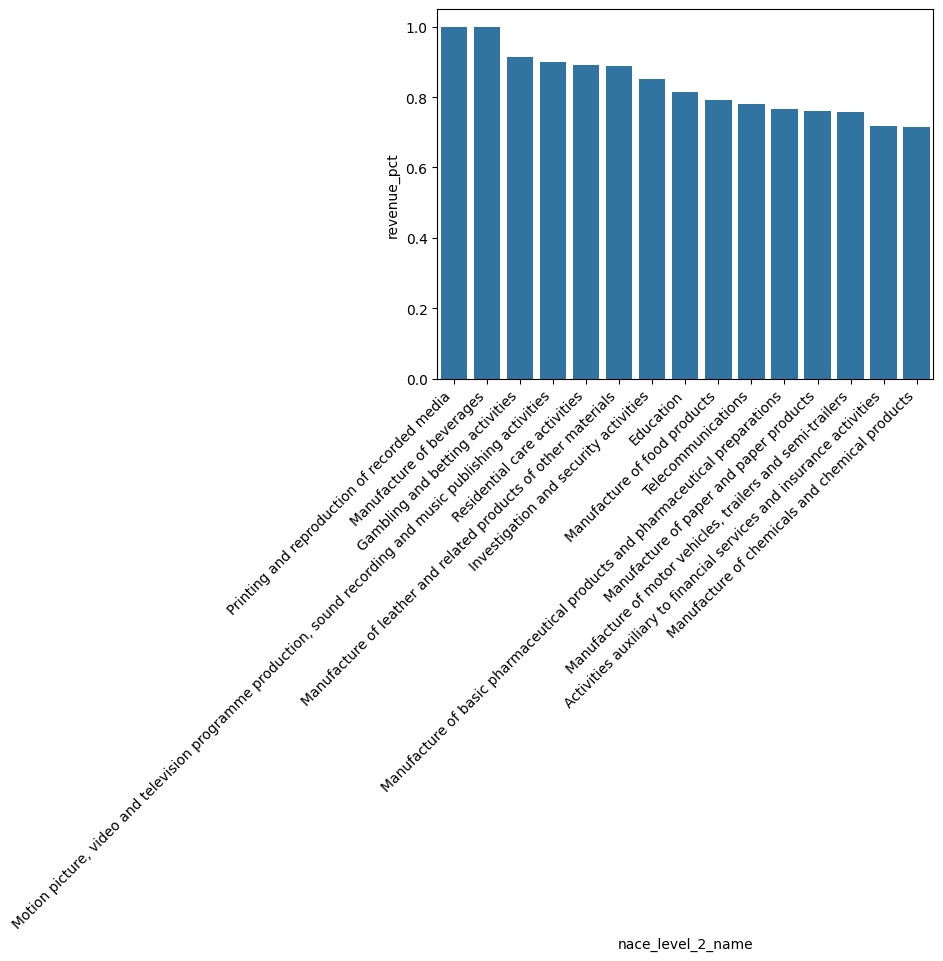

In [13]:
# nace_level_2 insights - top 15
avg_rev2 = (df.groupby("nace_level_2_name")["revenue_pct"].mean().reset_index().sort_values("revenue_pct", ascending=False))
avg_rev2 = avg_rev2.head(15)

sns.barplot(avg_rev2, x="nace_level_2_name", y="revenue_pct")
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Repair and maintenance of computers, personal and household goods, and motor vehicles and motorcycles'),
  Text(1, 0, 'Other personal service activities'),
  Text(2, 0, 'Forestry and logging'),
  Text(3, 0, 'Activities of households as employers of domestic personnel'),
  Text(4, 0, 'Remediation activities and other waste management service activities'),
  Text(5, 0, 'Manufacture of textiles'),
  Text(6, 0, 'Creative, arts and entertainment activities'),
  Text(7, 0, 'Sewerage'),
  Text(8, 0, 'Social work activities without accommodation'),
  Text(9, 0, 'Mining of metal ores'),
  Text(10, 0, 'Other mining and quarrying'),
  Text(11, 0, 'Programming, broadcasting, news agency and other content distribution activities'),
  Text(12, 0, 'Manufacture of basic metals'),
  Text(13, 0, 'Land transport and transport via pipelines'),
  Text(14, 0, 'Scientific research and development')])

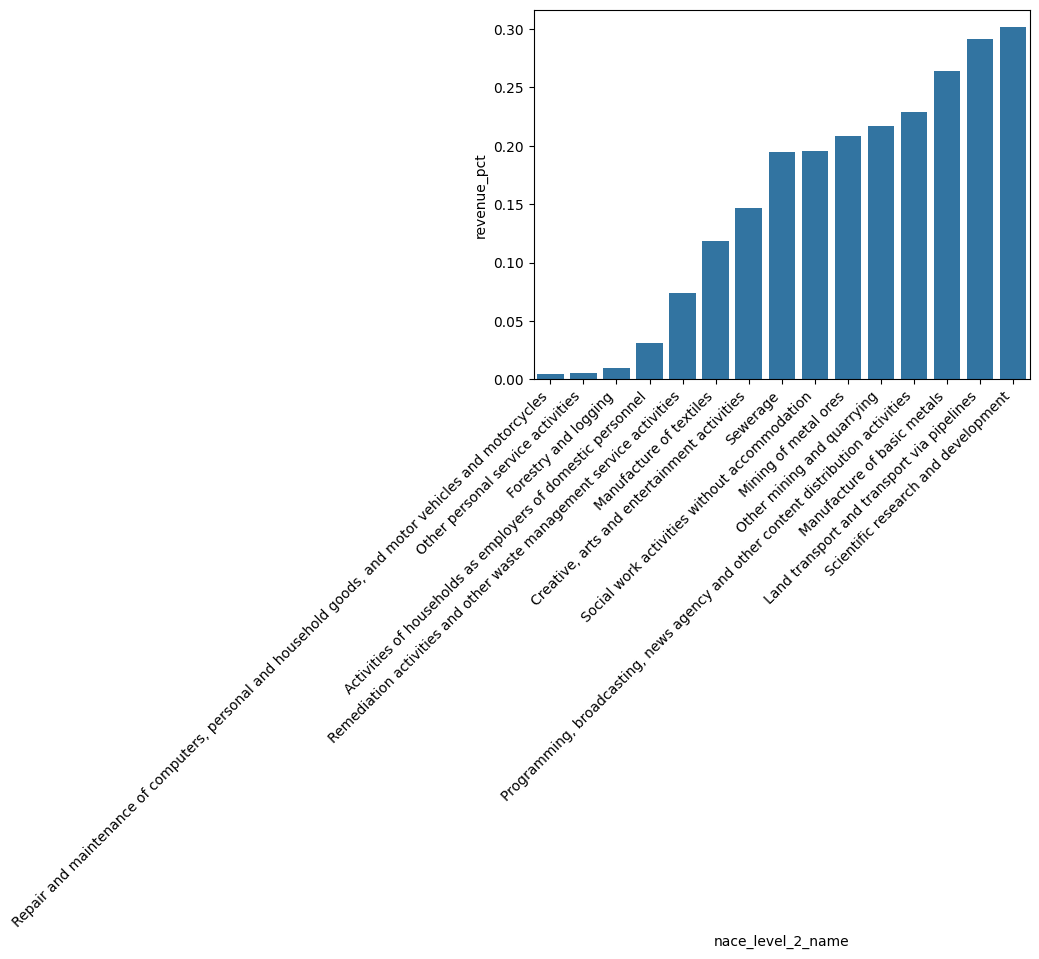

In [16]:
# bottom 15
avg_rev3 = (df.groupby("nace_level_2_name")["revenue_pct"].mean().reset_index().sort_values("revenue_pct", ascending=True))
avg_rev3 = avg_rev3.head(15)

sns.barplot(avg_rev3, x="nace_level_2_name", y="revenue_pct")
plt.xticks(rotation=45, ha='right')

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9')])

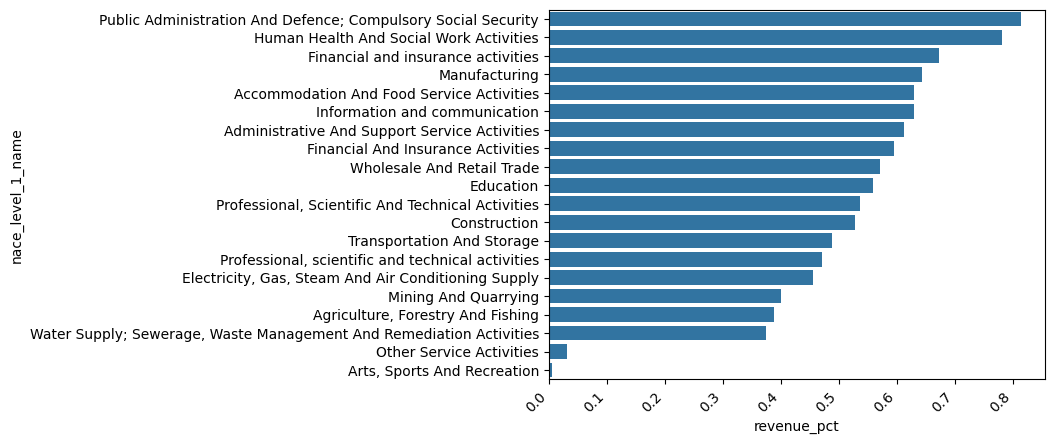

In [17]:
avg_rev = (df.groupby("nace_level_1_name")["revenue_pct"].mean().reset_index().sort_values("revenue_pct", ascending=False))

sns.barplot(data=avg_rev, x="revenue_pct", y="nace_level_1_name")
plt.xticks(rotation=45, ha='right')

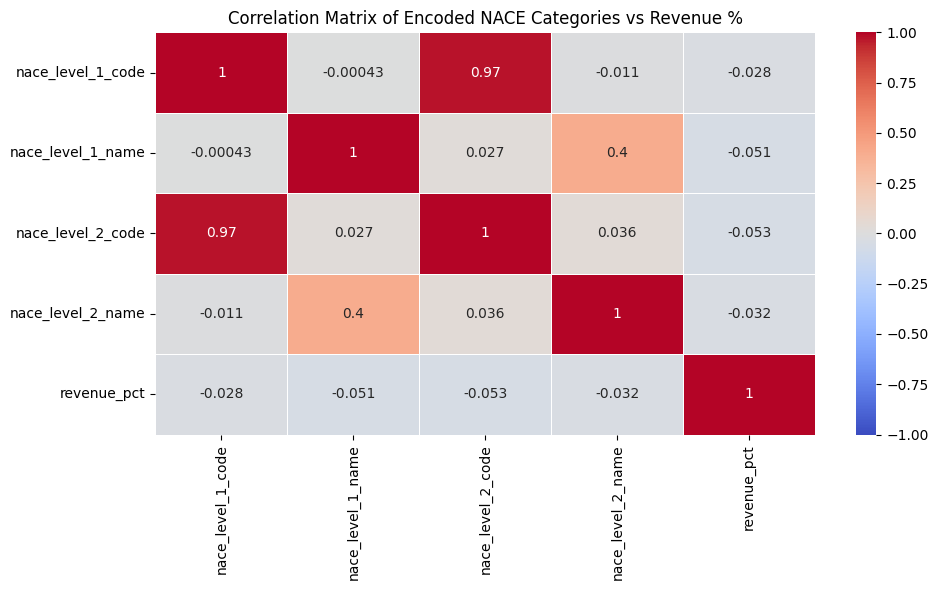

In [18]:
from sklearn.preprocessing import LabelEncoder
cat_cols = [
    "nace_level_1_code",
    "nace_level_1_name",
    "nace_level_2_code",
    "nace_level_2_name"
]

# Encode categories → numeric
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Correlation matrix
corr = df[cat_cols + ["revenue_pct"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    vmin=-1,
    vmax=1
)

plt.title("Correlation Matrix of Encoded NACE Categories vs Revenue %")
plt.tight_layout()
plt.show()

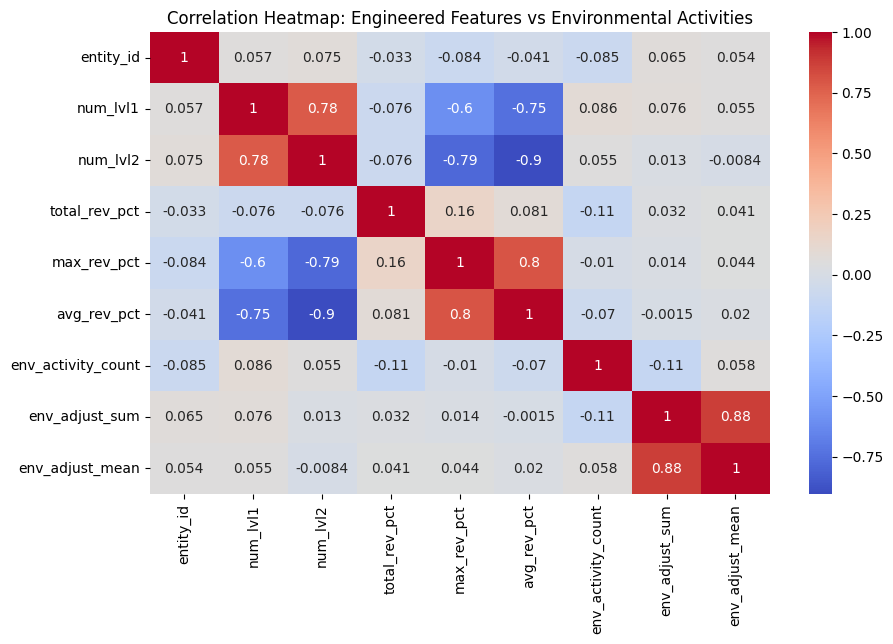

In [28]:
# df2 = pd.read_csv("./data/environmental_activities.csv")
# merged = df.merge(df2, on="entity_id", how="left")
# corr_df = merged.select_dtypes(include="number")
# plt.figure(figsize=(10, 7))
# sns.heatmap(
#     corr_df.corr(),
#     annot=True,
#     cmap="coolwarm",
#     fmt=".2f",
#     linewidths=.5
# )

# plt.title("Correlation Heatmap: Revenue Features vs Environmental Activities")
# plt.tight_layout()
# plt.show()
df2 = pd.read_csv("./data/environmental_activities.csv")

env_agg = (
    df2.groupby("entity_id")
       .agg(
            env_activity_count = ("activity_code", "count"),
            env_adjust_sum     = ("env_score_adjustment", "sum"),
            env_adjust_mean    = ("env_score_adjustment", "mean")
       )
       .reset_index()
)

rev_agg = (
    df.groupby("entity_id")
       .agg(
            num_lvl1      = ("nace_level_1_name", "nunique"),
            num_lvl2      = ("nace_level_2_name", "nunique"),
            total_rev_pct = ("revenue_pct", "sum"),
            max_rev_pct   = ("revenue_pct", "max"),
            avg_rev_pct   = ("revenue_pct", "mean")
       )
       .reset_index()
)

merged = rev_agg.merge(env_agg, on="entity_id", how="left")

corr = merged.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Engineered Features vs Environmental Activities")
plt.show()


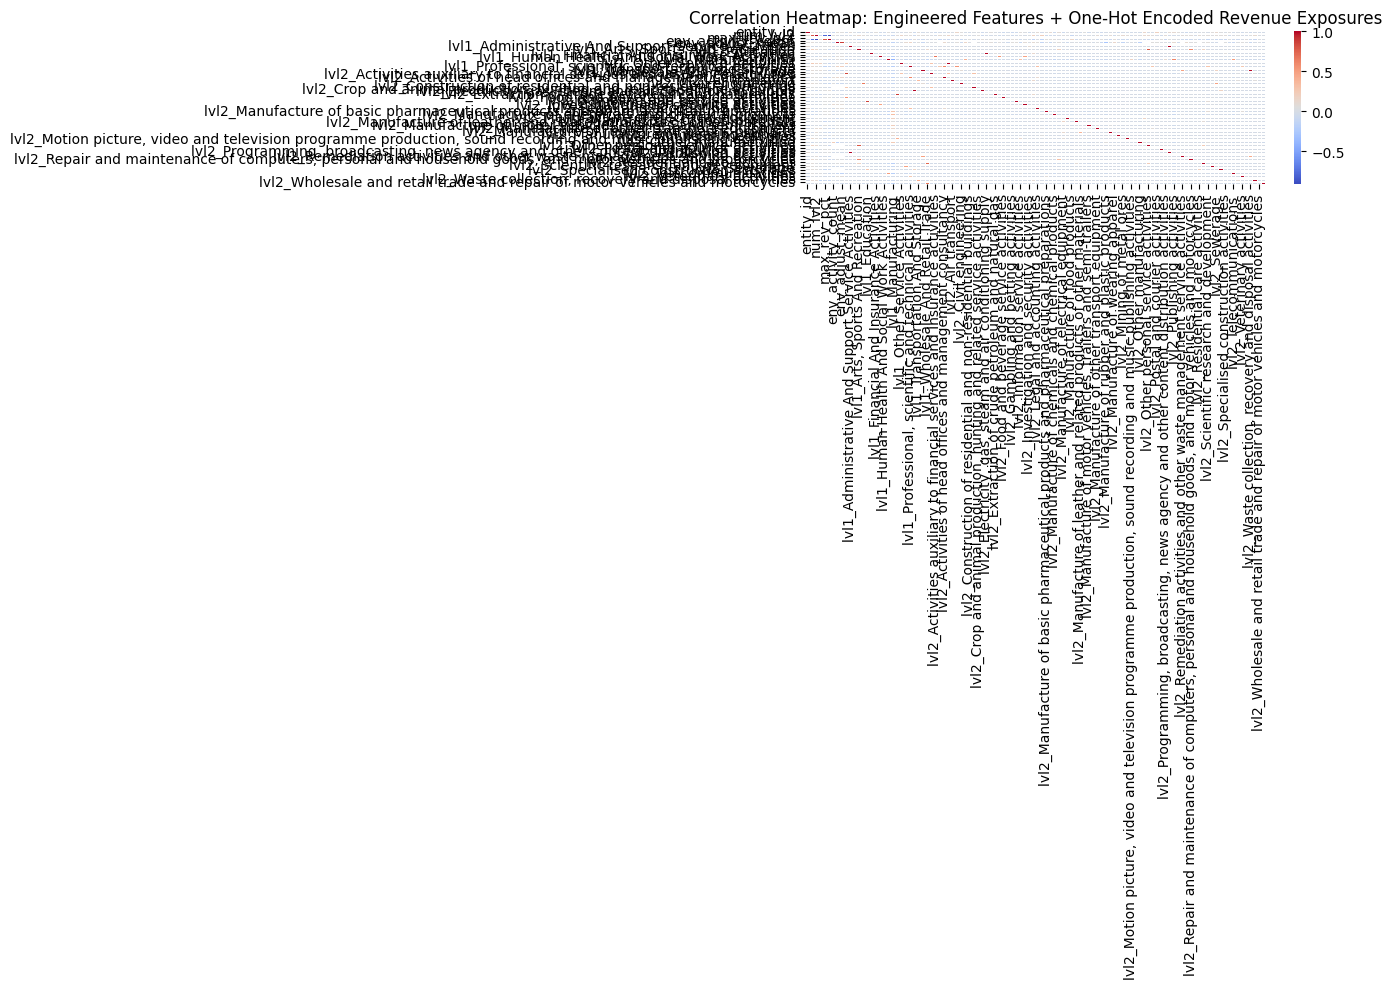

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Load Data
# -----------------------------
df = pd.read_csv("./data/revenue_distribution_by_sector.csv")
df2 = pd.read_csv("./data/environmental_activities.csv")

# -----------------------------
# ENVIRONMENTAL AGG FEATURES
# -----------------------------
env_agg = (
    df2.groupby("entity_id")
       .agg(
            env_activity_count = ("activity_code", "count"),
            env_adjust_sum     = ("env_score_adjustment", "sum"),
            env_adjust_mean    = ("env_score_adjustment", "mean")
       )
       .reset_index()
)

# -----------------------------
# REVENUE AGG FEATURES
# -----------------------------
rev_agg = (
    df.groupby("entity_id")
       .agg(
            num_lvl1      = ("nace_level_1_name", "nunique"),
            num_lvl2      = ("nace_level_2_name", "nunique"),
            total_rev_pct = ("revenue_pct", "sum"),
            max_rev_pct   = ("revenue_pct", "max"),
            avg_rev_pct   = ("revenue_pct", "mean")
       )
       .reset_index()
)

# -----------------------------
# ONE-HOT: LEVEL 1 SECTOR EXPOSURE
# -----------------------------
lvl1_ohe = (
    df.pivot_table(
        index="entity_id",
        columns="nace_level_1_name",
        values="revenue_pct",
        aggfunc="sum"
    )
    .fillna(0)
    .add_prefix("lvl1_")   # rename columns like lvl1_Manufacturing
)

# -----------------------------
# ONE-HOT: LEVEL 2 SECTOR EXPOSURE
# -----------------------------
lvl2_ohe = (
    df.pivot_table(
        index="entity_id",
        columns="nace_level_2_name",
        values="revenue_pct",
        aggfunc="sum"
    )
    .fillna(0)
    .add_prefix("lvl2_")   # rename columns like lvl2_Manufacture_of_Chemicals
)

# -----------------------------
# MERGE ALL ENGINEERED FEATURES
# -----------------------------
merged = (
    rev_agg
    .merge(env_agg, on="entity_id", how="left")
    .merge(lvl1_ohe, on="entity_id", how="left")
    .merge(lvl2_ohe, on="entity_id", how="left")
)

# -----------------------------
# BUILD NUMERIC FRAME FOR HEATMAP
# -----------------------------
corr_df = merged.select_dtypes(include="number")

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_df.corr(),
    annot=False,     # too many features, remove annotations
    cmap="coolwarm",
    linewidths=.5
)
plt.title("Correlation Heatmap: Engineered Features + One-Hot Encoded Revenue Exposures")
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# 1. LOAD DATA
# -----------------------------
train_df = pd.read_csv("./data/train.csv")
test_df  = pd.read_csv("./data/test.csv")

rev = pd.read_csv("./data/revenue_distribution_by_sector.csv")
env = pd.read_csv("./data/environmental_activities.csv")

# -----------------------------
# 2. AGGREGATE REVENUE DATA
# -----------------------------
rev_agg = (
    rev.groupby("entity_id")
       .agg(
            num_lvl1=("nace_level_1_name", "nunique"),
            num_lvl2=("nace_level_2_name", "nunique"),
            total_rev_pct=("revenue_pct", "sum"),
            max_rev_pct=("revenue_pct", "max"),
            avg_rev_pct=("revenue_pct", "mean"),
       )
       .reset_index()
)

# -----------------------------
# 3. AGGREGATE ENVIRONMENTAL DATA
# -----------------------------
env_agg = (
    env.groupby("entity_id")
       .agg(
            env_activity_count=("activity_code", "count"),
            env_adjust_sum=("env_score_adjustment", "sum"),
            env_adjust_mean=("env_score_adjustment", "mean"),
       )
       .reset_index()
)

# -----------------------------
# 4. MERGE INTO TRAIN + TEST
# -----------------------------
train = (
    train_df
    .merge(rev_agg, on="entity_id", how="left")
    .merge(env_agg, on="entity_id", how="left")
)

test = (
    test_df
    .merge(rev_agg, on="entity_id", how="left")
    .merge(env_agg, on="entity_id", how="left")
)

# Fill missing environmental rows
train = train.fillna(0)
test  = test.fillna(0)

# -----------------------------
# 5. SELECT FEATURES
# -----------------------------
numeric_cols = [
    "revenue",
    "overall_score",
    "environmental_score",
    "social_score",
    "governance_score",
    "num_lvl1", "num_lvl2",
    "total_rev_pct", "max_rev_pct", "avg_rev_pct",
    "env_activity_count", "env_adjust_sum", "env_adjust_mean",
]

categorical_cols = ["region_code", "country_code"]

X = train[numeric_cols + categorical_cols]
y1 = train["target_scope_1"]
y2 = train["target_scope_2"]

# -----------------------------
# 6. ONE-HOT ENCODING + LINEAR MODEL
# -----------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

model = Pipeline([
    ("prep", preprocess),
    ("lr", LinearRegression())
])

# -----------------------------
# 7. TRAIN / VALIDATION SPLIT
# -----------------------------
X_train, X_val, y1_train, y1_val = train_test_split(X, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_val = train_test_split(X, y2, test_size=0.2, random_state=42)

# -----------------------------
# 8. FIT LINEAR REGRESSION
# -----------------------------
model.fit(X_train, y1_train)
pred1 = model.predict(X_val)

print("===== Scope 1 Metrics =====")
print("MAE:", mean_absolute_error(y1_val, pred1))
print("RMSE:", np.sqrt(mean_squared_error(y1_val, pred1)))
print("R²:", r2_score(y1_val, pred1))

# Train model for Scope 2
model2 = Pipeline([
    ("prep", preprocess),
    ("lr", LinearRegression())
])
model2.fit(X_train, y2_train)
pred2 = model2.predict(X_val)

print("\n===== Scope 2 Metrics =====")
print("MAE:", mean_absolute_error(y2_val, pred2))
print("RMSE:", np.sqrt(mean_squared_error(y2_val, pred2)))
print("R²:", r2_score(y2_val, pred2))

# -----------------------------
# 9. PREDICT ON TEST SET
# -----------------------------
test_pred1 = model.predict(test[numeric_cols + categorical_cols])
test_pred2 = model2.predict(test[numeric_cols + categorical_cols])

# -----------------------------
# 10. EXPORT SUBMISSION
# -----------------------------
submission = pd.DataFrame({
    "entity_id": test["entity_id"],
    "target_scope_1": test_pred1,
    "target_scope_2": test_pred2
})

submission.to_csv("submission_linear_regression.csv", index=False)
submission.head()



===== Scope 1 Metrics =====
MAE: 81284.88598345134
RMSE: 148437.43750902722
R²: -0.10838183679971336

===== Scope 2 Metrics =====
MAE: 78667.90843958025
RMSE: 169110.60179769556
R²: 0.06418622690086884


,entity_id,target_scope_1,target_scope_2
0,1076,24108.755834,-3877.205096
1,2067,30178.277883,-19753.439421
2,910,43297.123447,31964.465176
3,4082,88433.354889,71319.742432
4,4102,-13484.989015,-24268.188083
